In [1]:
# Instacart Market Basket Analysis 1 - Initial Analysis

In [2]:
# 1. Data Cleaning, Description and Analysis

In [3]:
#1: Library Imports
!pip install kaggle
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn

In [12]:
#replace with your username and key
%env KAGGLE_USERNAME=
%env KAGGLE_KEY=

env: KAGGLE_USERNAME=
env: KAGGLE_KEY=


In [5]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
sns.set_style('darkgrid')
# matplotlib and seaborn for plotting
matplotlib.rcParams['figure.dpi'] = 120 #resolution
matplotlib.rcParams['figure.figsize'] = (8,6) #figure size
color = sns.color_palette()
# pd.set_option('max_columns', 150)


In [6]:
#2. Fetch the data

In [7]:
!kaggle competitions download -c instacart-market-basket-analysis -p ../instacart_data_files/

100%|███████████████████████████████████████▉| 196M/196M [00:13<00:00, 17.6MB/s]
100%|████████████████████████████████████████| 196M/196M [00:13<00:00, 15.1MB/s]


In [8]:
!unzip -o ../instacart_data_files/instacart-market-basket-analysis.zip -d ../instacart_data_files/

Archive:  ../instacart_data_files/instacart-market-basket-analysis.zip
  inflating: ../instacart_data_files/aisles.csv.zip  
  inflating: ../instacart_data_files/departments.csv.zip  
  inflating: ../instacart_data_files/order_products__prior.csv.zip  
  inflating: ../instacart_data_files/order_products__train.csv.zip  
  inflating: ../instacart_data_files/orders.csv.zip  
  inflating: ../instacart_data_files/products.csv.zip  
  inflating: ../instacart_data_files/sample_submission.csv.zip  


In [9]:
import os
root = '../instacart_data_files/'
dirs = os.listdir(root)
print("dirs: ", dirs)

dirs:  ['order_products__prior.csv.zip', 'order_products__train.csv.zip', 'aisles.csv.zip', 'orders.csv.zip', 'departments.csv.zip', 'products.csv.zip', 'sample_submission.csv.zip', 'instacart-market-basket-analysis.zip']


In [10]:
for filename in os.listdir(root):
  if not filename.endswith(".zip"):
    continue
  os.system("unzip -o {} -d {}".format(os.path.join(root, filename), root))

Archive:  ../instacart_data_files/order_products__prior.csv.zip
  inflating: ../instacart_data_files/order_products__prior.csv  
   creating: ../instacart_data_files/__MACOSX/
  inflating: ../instacart_data_files/__MACOSX/._order_products__prior.csv  
Archive:  ../instacart_data_files/order_products__train.csv.zip
  inflating: ../instacart_data_files/order_products__train.csv  
  inflating: ../instacart_data_files/__MACOSX/._order_products__train.csv  
Archive:  ../instacart_data_files/aisles.csv.zip
  inflating: ../instacart_data_files/aisles.csv  
  inflating: ../instacart_data_files/__MACOSX/._aisles.csv  
Archive:  ../instacart_data_files/orders.csv.zip
  inflating: ../instacart_data_files/orders.csv  
  inflating: ../instacart_data_files/__MACOSX/._orders.csv  
Archive:  ../instacart_data_files/departments.csv.zip
  inflating: ../instacart_data_files/departments.csv  
  inflating: ../instacart_data_files/__MACOSX/._departments.csv  
Archive:  ../instacart_data_files/products.csv.z

In [11]:
aisles = pd.read_csv(root + 'aisles.csv')
departments = pd.read_csv(root + 'departments.csv')
orders = pd.read_csv(root + 'orders.csv')
order_products_prior = pd.read_csv(root + 'order_products__prior.csv')
order_products_train = pd.read_csv(root + 'order_products__train.csv')
products = pd.read_csv(root + 'products.csv')

In [13]:
##1. Data Cleaning

In [14]:
print("orders has null values")
print("aisles null values? ", aisles.isnull().values.any())
print("departments null values? ", departments.isnull().values.any())
print("orders null values? ", orders.isnull().values.any())
print("order_products_prior null values? ", order_products_prior.isnull().values.any())
print("order_products_train null values? ", order_products_train.isnull().values.any())
print("products null values? ", products.isnull().values.any())

orders has null values
aisles null values?  False
departments null values?  False
orders null values?  True
order_products_prior null values?  False
order_products_train null values?  False
products null values?  False


In [15]:
missing_values_count = orders.isnull().sum()
print(missing_values_count)
print("For every user’s 1st order, the days_since_prior_order is Nan, which makes sense. We can impute 0 here.")

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64
For every user’s 1st order, the days_since_prior_order is Nan, which makes sense. We can impute 0 here.


In [16]:
print("Order shape: ", orders.shape)
orders.loc[orders['order_number'] == 1] = orders.loc[orders['order_number'] == 1].fillna(0)
print("Order shape: ", orders.shape)
print("orders null values? ", orders.isnull().values.any())

Order shape:  (3421083, 7)
Order shape:  (3421083, 7)
orders null values?  False


In [17]:
#2. Data Description
# Aisles: 

In [18]:
aisles.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [19]:
print("Number of unique aisles: ", len(aisles.aisle_id.unique()))

Number of unique aisles:  134


In [20]:
# Departments:

In [21]:
departments.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [22]:
print("Number of unique departments: ", len(departments.department_id.unique()))

Number of unique departments:  21


In [23]:
print("Unique Department Names: ", departments.department.unique())

Unique Department Names:  ['frozen' 'other' 'bakery' 'produce' 'alcohol' 'international' 'beverages'
 'pets' 'dry goods pasta' 'bulk' 'personal care' 'meat seafood' 'pantry'
 'breakfast' 'canned goods' 'dairy eggs' 'household' 'babies' 'snacks'
 'deli' 'missing']


In [24]:
#Orders:

In [25]:
orders.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,0.0
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [26]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3421083 entries, 0 to 3421082
Data columns (total 7 columns):
 #   Column                  Dtype  
---  ------                  -----  
 0   order_id                int64  
 1   user_id                 int64  
 2   eval_set                object 
 3   order_number            int64  
 4   order_dow               int64  
 5   order_hour_of_day       int64  
 6   days_since_prior_order  float64
dtypes: float64(1), int64(5), object(1)
memory usage: 182.7+ MB


In [27]:
print("Number of orders made: {v1} by number of users: {v2} ".format(v1 = len(orders.order_id.unique()), v2 = len(orders.user_id.unique())))


Number of orders made: 3421083 by number of users: 206209 


In [28]:
print("The total orders per customer ranges from 0 to 100.")
orders.order_number.describe().apply(lambda x: format(x, '.2f'))

The total orders per customer ranges from 0 to 100.


count    3421083.00
mean          17.15
std           17.73
min            1.00
25%            5.00
50%           11.00
75%           23.00
max          100.00
Name: order_number, dtype: object

In [29]:
order_number = orders.groupby('user_id')['order_number'].max()
order_number = order_number.value_counts()
order_number

order_number
4     23986
5     19590
6     16165
7     13850
8     11700
      ...  
94       57
91       56
97       54
98       50
99       47
Name: count, Length: 97, dtype: int64

The total orders per customer ranges from 0 to 100.


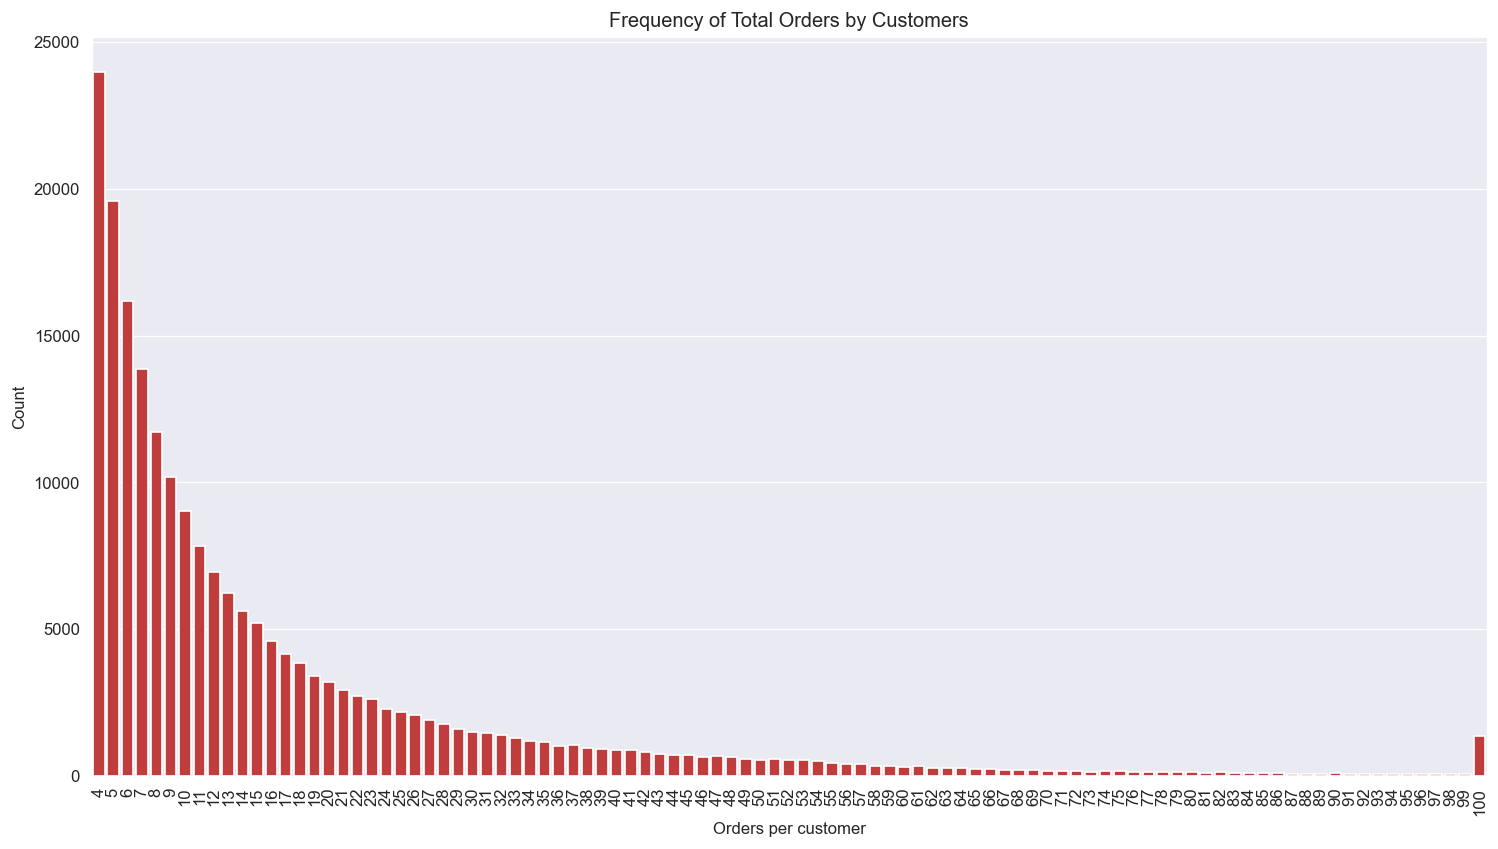

In [30]:
print("The total orders per customer ranges from 0 to 100.")
fig, ax = plt.subplots(figsize=(15,8))
ax = sns.barplot(x = order_number.index, y = order_number.values, color = color[3])
ax.set_xlabel('Orders per customer')
ax.set_ylabel('Count')
ax.xaxis.set_tick_params(rotation=90, labelsize=10)
ax.set_title('Frequency of Total Orders by Customers')
fig.savefig('Frequency of Total Orders by Customers.png')

In [ ]:
print("There are three sets of orders: Prior, Train and Test. This file tells to which set (prior, train, test) an order belongs")
orders.eval_set.value_counts()
